# Setup Tensorflow 2.0

In [126]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.0.0:
  Would remove:
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.0.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.0.0


In [127]:
!pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl


In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Fetch data from kaggle API

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [3]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [0]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
fer2013.tar.gz: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
icml_face_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
example_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


# Data setup

In [0]:
import pandas as pd
data = pd.read_csv('/content/icml_face_data.csv.zip', compression='zip')

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt

In [0]:
import random

In [10]:
data.head(10)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,Training,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,Training,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,Training,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,Training,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,Training,255 254 255 254 254 179 122 107 95 124 149 150...


In [11]:
data.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

In [12]:
data.shape

(35887, 3)

In [13]:
data.loc[data[" Usage"] == "Training"].head(5)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [0]:
def string_to_int_array(item):
    return [int(p) for p in item.split()]

In [0]:
def process_dataframe(data):
  X = [string_to_int_array(item) for item in data.iloc[:, 2].values]
  X = np.array(X) / 255.0
  y = np.array(data.iloc[:, 0].values)
  y = y.astype(np.float32, copy=False)
    
  return X, y

In [0]:
train_X, train_y = process_dataframe(data.loc[data[' Usage'] == 'Training'])
test_X, test_y = process_dataframe(data.loc[data[' Usage'] == 'PublicTest'])
validate_X, validate_y = process_dataframe(data.loc[data[' Usage'] == 'PrivateTest'])

In [18]:
len(train_X)

28709

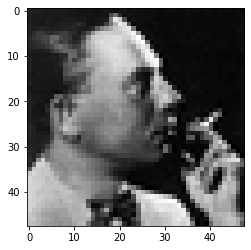

In [19]:
plt.imshow(
    train_X[random.randint(1, train_X.shape[0])].reshape(48, 48),
    cmap='gist_gray')

# Linear Model

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model = keras.Sequential([
                          keras.layers.Dense(512,activation=tf.nn.relu),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(128,activation=tf.nn.relu),
                          keras.layers.Dense(7,activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(train_X,train_y,epochs=10)

Train on 28709 samples
Epoch 1/10
28709/28709 [==============================] - 9s 326us/sample - loss: 1.6919 - accuracy: 0.3304
Epoch 2/10
28709/28709 [==============================] - 9s 326us/sample - loss: 1.6629 - accuracy: 0.3445
Epoch 3/10
28709/28709 [==============================] - 9s 324us/sample - loss: 1.6388 - accuracy: 0.3554
Epoch 4/10
28709/28709 [==============================] - 9s 327us/sample - loss: 1.6263 - accuracy: 0.3601
Epoch 5/10
28709/28709 [==============================] - 9s 325us/sample - loss: 1.6076 - accuracy: 0.3692
Epoch 6/10
28709/28709 [==============================] - 9s 329us/sample - loss: 1.5992 - accuracy: 0.3718
Epoch 7/10
28709/28709 [==============================] - 9s 325us/sample - loss: 1.5885 - accuracy: 0.3761
Epoch 8/10
28709/28709 [==============================] - 9s 324us/sample - loss: 1.5770 - accuracy: 0.3836
Epoch 9/10
28709/28709 [==============================] - 9s 327us/sample - loss: 1.5671 - accuracy: 0.3868
Epoch

In [26]:
model.evaluate(test_X, test_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5644379275261642, 0.38450822]

In [27]:
model.evaluate(validate_X,validate_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5626723152510333, 0.3794929]

# Convolution Model

In [0]:
modelCNN = keras.Sequential([
                          keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu,input_shape=(48,48,1)),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Flatten(input_shape=()),
                          keras.layers.Dense(256,activation=tf.nn.relu),
                          keras.layers.Dense(7,activation=tf.nn.softmax)])

In [0]:
modelCNN.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_X2d = train_X.reshape(-1,48,48,1,)

In [31]:
train_X.shape

(28709, 2304)

In [32]:
train_X2d.shape

(28709, 48, 48, 1)

In [33]:
modelCNN.fit(train_X2d,train_y,epochs=10)

Train on 28709 samples
Epoch 1/10
28709/28709 [==============================] - 113s 4ms/sample - loss: 1.6088 - accuracy: 0.3646
Epoch 2/10
28709/28709 [==============================] - 112s 4ms/sample - loss: 1.4003 - accuracy: 0.4620
Epoch 3/10
28709/28709 [==============================] - 110s 4ms/sample - loss: 1.3018 - accuracy: 0.5043
Epoch 4/10
28709/28709 [==============================] - 109s 4ms/sample - loss: 1.2187 - accuracy: 0.5339
Epoch 5/10
28709/28709 [==============================] - 109s 4ms/sample - loss: 1.1375 - accuracy: 0.5734
Epoch 6/10
28709/28709 [==============================] - 111s 4ms/sample - loss: 1.0481 - accuracy: 0.6071
Epoch 7/10
28709/28709 [==============================] - 109s 4ms/sample - loss: 0.9568 - accuracy: 0.6467
Epoch 8/10
28709/28709 [==============================] - 110s 4ms/sample - loss: 0.8618 - accuracy: 0.6837
Epoch 9/10
28709/28709 [==============================] - 110s 4ms/sample - loss: 0.7672 - accuracy: 0.7203
Epoch

In [0]:
test_X2d = test_X.reshape(-1,48,48,1,)

In [35]:
modelCNN.evaluate(test_X2d, test_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5127602608033162, 0.529674]

In [0]:
validate_X2d = validate_X.reshape(-1,48,48,1,)

In [37]:
modelCNN.evaluate(validate_X2d, validate_y)

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.5232590211404335, 0.522151]